# Employee Attrition Analysis
Codec Technologies Internship Project  
Intern: Arya Vijay Sakore  
Duration: January 2026 – February 2026  

## Problem Statement
The objective of this project is to analyze factors influencing employee attrition
and build a machine learning model to predict employees who are likely to leave.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Dataset Shape

In [3]:
df.shape


(1470, 35)

Data Info

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Missing Values

In [5]:
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Exploratory Data Analysis (EDA)


Target Variable Distribution

In [6]:
df['Attrition'].value_counts()


,count
Attrition,
No,1233
Yes,237


In [7]:
df['Attrition'].value_counts(normalize=True) * 100


,proportion
Attrition,
No,83.877551
Yes,16.122449


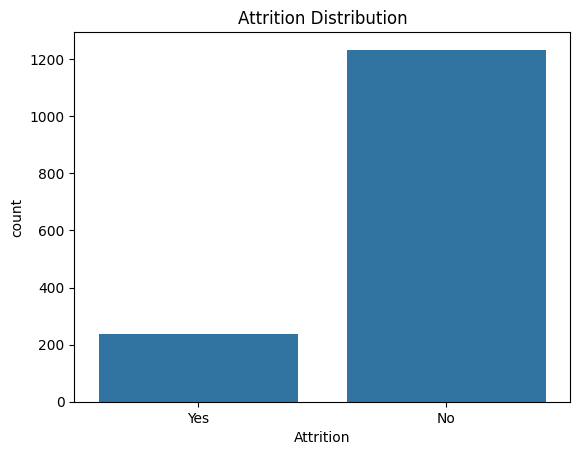

In [8]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()


### Observation:
The dataset is imbalanced. Around 84% employees did not leave, while 16% left.
This imbalance must be considered during model evaluation.


### Overtime vs Attrition


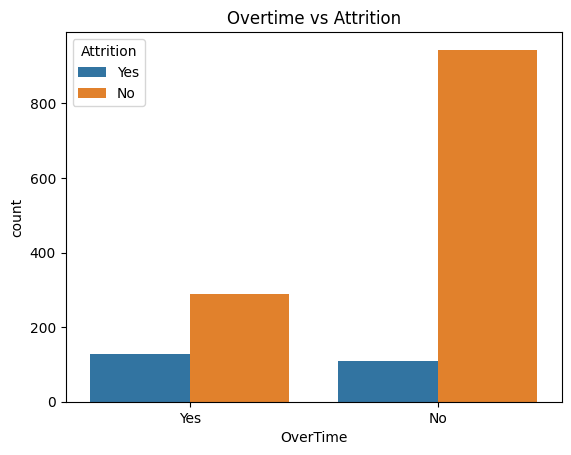

In [9]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime vs Attrition")
plt.show()


### Observation:
Employees who work overtime are more likely to leave the company.
Overtime appears to be a significant factor influencing attrition.
This feature may have strong predictive importance in the model.


### Monthly Income vs Attrition


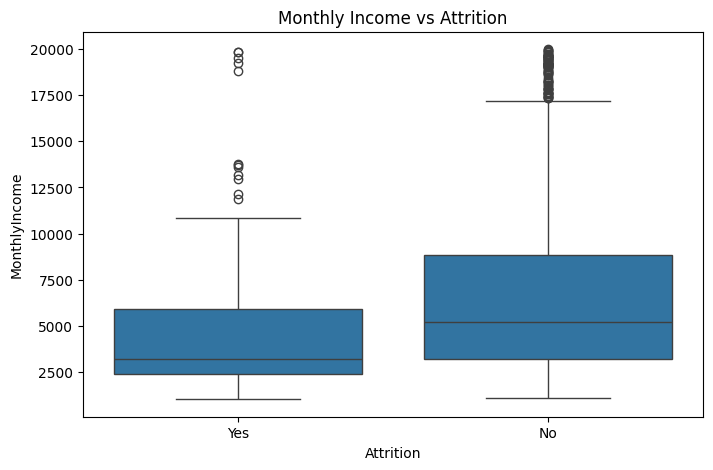

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


### Observation:
Employees who left the company generally have lower monthly income compared to those who stayed.
This suggests that salary may be a significant factor influencing employee attrition.
Lower income employees appear more likely to resign.


### Job Role vs Attrition


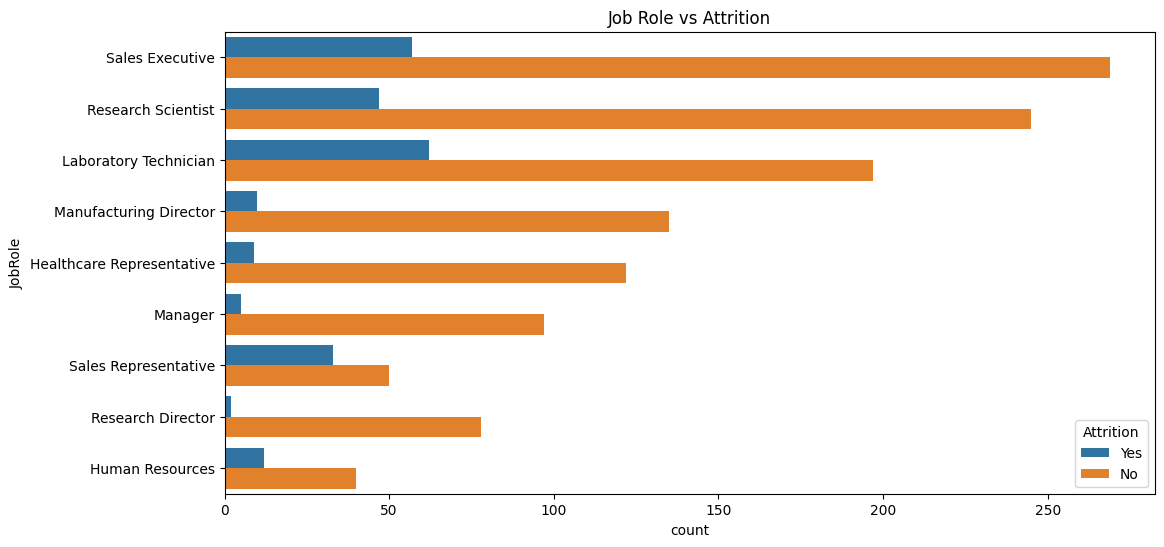

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title("Job Role vs Attrition")
plt.show()


### Observation:
Laboratory Technicians show the highest attrition count, followed by Sales Executives.
This suggests that operational and sales-oriented roles may experience higher work pressure,
job dissatisfaction, or turnover rates compared to other departments.
These roles may require targeted retention strategies.


### Correlation Heatmap


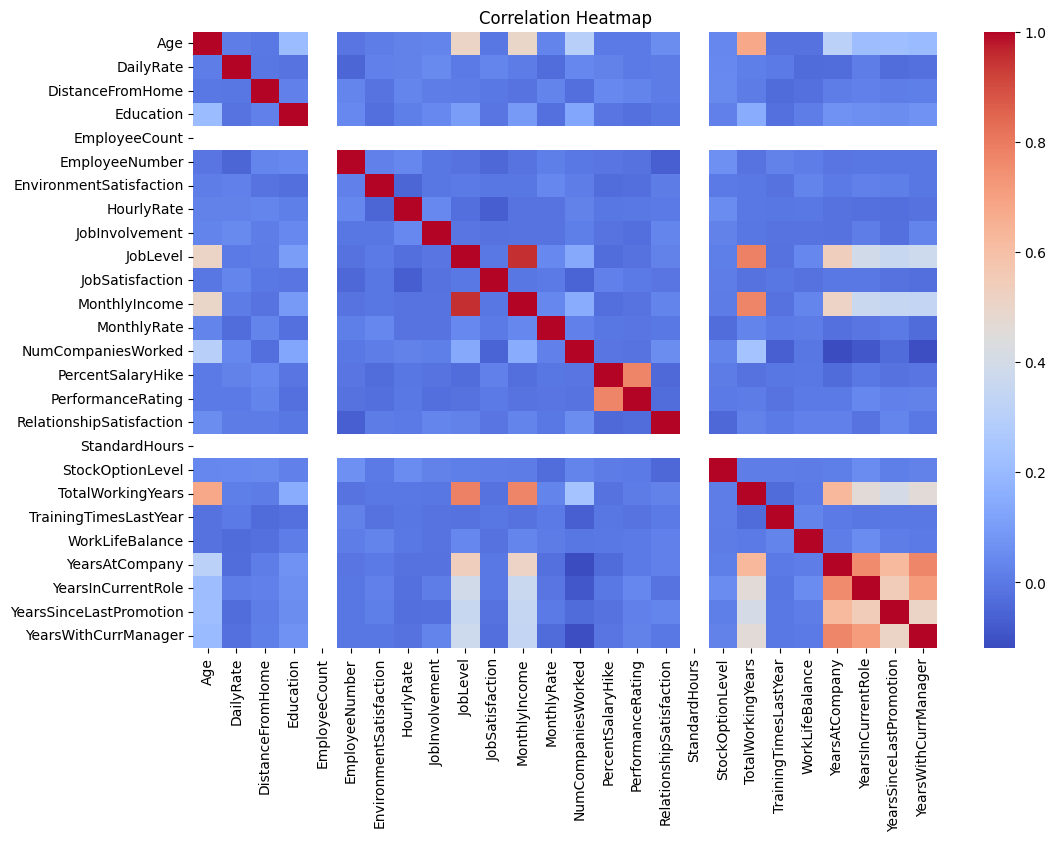

In [12]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Observation:
MonthlyIncome is strongly correlated with JobLevel and TotalWorkingYears,
indicating that senior employees and higher job levels earn higher salaries.

YearsAtCompany is strongly correlated with YearsInCurrentRole and YearsWithCurrManager,
which is expected as tenure increases with experience.

PercentSalaryHike shows strong correlation with PerformanceRating,
indicating performance-based compensation policies.


## Data Preprocessing


In [13]:
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df['Attrition'].unique()


array(['Yes', 'No'], dtype=object)

In [14]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})


In [15]:
df['Attrition'].unique()


array([1, 0])

In [16]:
df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours'], axis=1)


In [17]:
df = pd.get_dummies(df, drop_first=True)


In [18]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Training and Evaluation


###Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [22]:
y_pred_log = log_model.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.8605442176870748
ROC-AUC: 0.6499698509776898

Confusion Matrix:
 [[237  10]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



### Logistic Regression Interpretation:

Although the model achieved 86% accuracy, recall for attrition (class 1) is low (34%).
This indicates that the model struggles to correctly identify employees who are likely to leave.

Since the dataset is imbalanced, accuracy alone is not a reliable metric.
Improving recall for attrition should be a priority.


### Random Forest Classifier


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
y_pred_rf = rf_model.predict(X_test)


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8333333333333334
ROC-AUC: 0.5390214488758722

Confusion Matrix:
 [[240   7]
 [ 42   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



### Model Comparison:

Logistic Regression performed better than Random Forest in terms of recall and ROC-AUC.
Random Forest heavily biased toward predicting employees who stay.

Both models struggle due to class imbalance.
Further improvements could involve resampling techniques or class weighting.


In [27]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

y_pred_log_bal = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log_bal))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_bal))

print("\nClassification Report:\n", classification_report(y_test, y_pred_log_bal))


Accuracy: 0.7517006802721088
ROC-AUC: 0.6971746059092083

Confusion Matrix:
 [[192  55]
 [ 18  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294



### Final Model Selection:

Balanced Logistic Regression was selected as the best model.

Although overall accuracy decreased to 75%, recall for attrition improved significantly to 62%.

Since identifying employees likely to leave is more important than overall accuracy,
the balanced logistic regression model provides better business value.


## Conclusion and Business Recommendations

### Key Findings:

- The dataset is imbalanced, with only 16% employees leaving the company.
- Overtime significantly increases the likelihood of attrition.
- Employees with lower monthly income are more likely to resign.
- Laboratory Technicians and Sales Executives show higher attrition rates.
- Salary and job level are strongly correlated with employee retention.

### Model Performance Summary:

- Logistic Regression achieved 86% accuracy but had low recall (34%) for attrition.
- Random Forest underperformed in identifying employees who left.
- Balanced Logistic Regression improved recall to 62%, making it the most suitable model.

### Business Recommendations:

- Monitor employees working overtime frequently.
- Review compensation strategies for lower income bands.
- Implement targeted retention programs for high-risk job roles.
- Use the balanced logistic regression model as an early warning system to identify at-risk employees.
